# Model Training 

In [656]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

warnings.filterwarnings("ignore")

In [658]:
# import the data
data=pd.read_csv("StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [660]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [662]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [664]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [666]:
lab_enc=LabelEncoder()

In [668]:
data["gender"]=lab_enc.fit_transform(data["gender"])
data["lunch"]=lab_enc.fit_transform(data["lunch"])
data["test preparation course"]=lab_enc.fit_transform(data["test preparation course"]) 

In [670]:
encoded_data=pd.get_dummies(data[["race/ethnicity","parental level of education"]])
encoded_data=encoded_data.replace(True,1).replace(False,0)

In [672]:
# dropping non encoded columns 
data.drop(columns=["race/ethnicity","parental level of education"],inplace=True)


In [674]:
# data shape
data.shape


(1000, 6)

In [676]:
data=pd.concat([data,encoded_data],axis=1)

In [678]:
data.head(2)

,gender,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,1,1,72,72,74,0,1,0,0,0,0,1,0,0,0,0
1,0,1,0,69,90,88,0,0,1,0,0,0,0,0,0,1,0


In [680]:
data.shape

(1000, 17)

#### checking multicolinearty 

<Axes: >

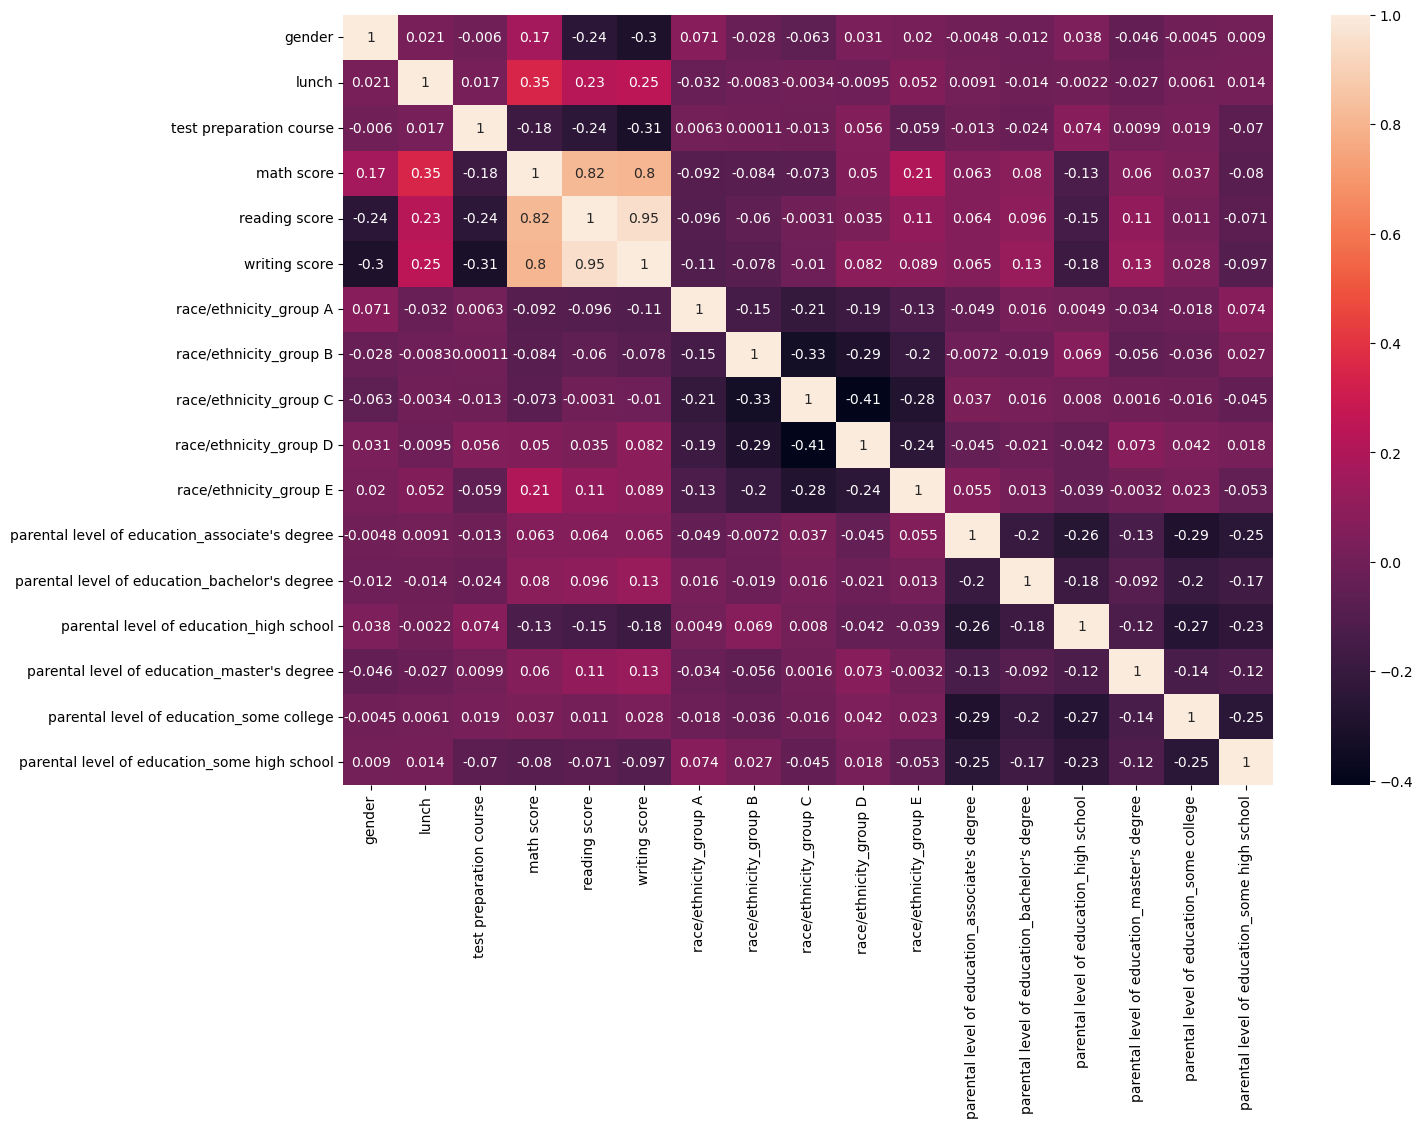

In [683]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,color="skyblue")

#### As we can see with heatmap writing and reading score are highly corelated let's see this with graph

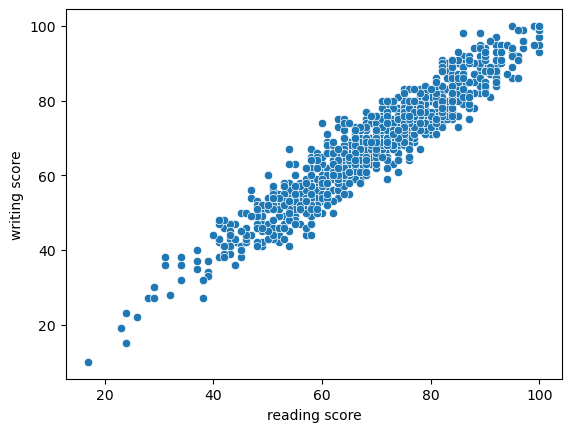

In [685]:
sns.scatterplot(x="reading score",y="writing score",data=data)
plt.show()

* As we can see they are highly correlated now we will drop that features which will have lowest realtion with target column.

In [687]:
data.drop(columns=["writing score"],inplace=True)

In [688]:
X=data.drop(columns=["math score"])
y=data["math score"]

In [689]:
x_scaled=scaler.fit_transform(X)

#### Splitting the data into two parts.

In [691]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=4)
print(x_train.shape,x_test.shape)

(800, 15) (200, 15)


#### Create an Evaluate Function to give all metrics after model Training

In [694]:
def evaluate_model(y_true,y_pred):
    mae=round(mean_absolute_error(y_true,y_pred),2)
    rmse=round(np.sqrt(mean_squared_error(y_true,y_pred)),2)
    r2_square=round(r2_score(y_true,y_pred),2)


    return mae,rmse,r2_square

In [695]:
data.head(2)

,gender,lunch,test preparation course,math score,reading score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,1,1,72,72,0,1,0,0,0,0,1,0,0,0,0
1,0,1,0,69,90,0,0,1,0,0,0,0,0,0,1,0


In [697]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list_train =[]
r2_list_test =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae,model_train_rmse,model_train_r2 = evaluate_model(y_train,y_train_pred)

    model_test_mae,model_test_rmse,model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print(f"- Root Mean Squared Error:{model_train_rmse}")
    print(f"- Mean Absolute Error {model_train_mae}")
    print(f"- R2 Score: {model_train_r2}")
    r2_list_train.append(model_test_r2)


    print('----------------------------------')
    
    print('Model performance for Test set')
    print(f"- Root Mean Squared Error: {model_test_rmse}")
    print(f"- Mean Absolute Error: {model_test_mae}")
    print(f"- R2 Score:  {model_test_r2}")
    r2_list_test.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error:5.89
- Mean Absolute Error 4.64
- R2 Score: 0.85
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.44
- Mean Absolute Error: 5.22
- R2 Score:  0.83


Lasso
Model performance for Training set
- Root Mean Squared Error:6.27
- Mean Absolute Error 4.93
- R2 Score: 0.83
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.44
- Mean Absolute Error: 5.15
- R2 Score:  0.83


Ridge
Model performance for Training set
- Root Mean Squared Error:5.88
- Mean Absolute Error 4.65
- R2 Score: 0.85
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.41
- Mean Absolute Error: 5.21
- R2 Score:  0.83


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error:8.36
- Mean Absolute Error 6.65
- R2 Score: 0.69
----------------------------------
Model performance for Test set
- Ro

In [701]:
model_perf=pd.DataFrame(list(zip(model_list,r2_list_train,r2_list_test)),columns=["Model","r2_score_train","r2_score_test"])
model_perf

,Model,r2_score_train,r2_score_test
0,Linear Regression,0.83,0.83
1,Lasso,0.83,0.83
2,Ridge,0.83,0.83
3,K-Neighbors Regressor,0.45,0.45
4,Decision Tree,0.70,0.70
5,Random Forest Regressor,0.81,0.81
6,XGBRegressor,0.76,0.76
7,AdaBoost Regressor,0.82,0.82


# Selcting LinearRegression 

In [708]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 83.36


In [710]:
# seeing linear relationship b/w y_test,y_pred

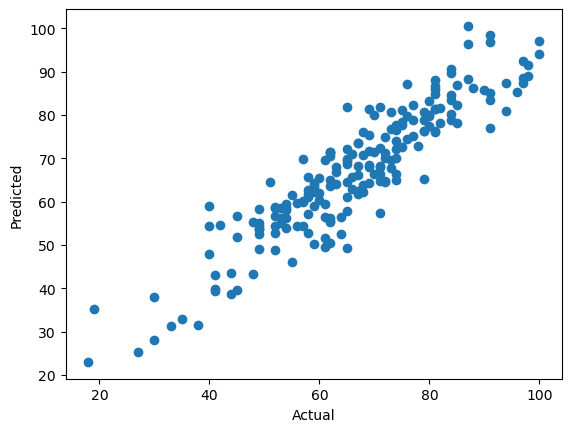

In [712]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [713]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
698,57,69.908984,-12.908984
577,81,81.408984,-0.408984
763,62,55.283984,6.716016
790,48,55.283984,-7.283984
520,71,57.283984,13.716016
...,...,...,...
127,65,81.783984,-16.783984
924,74,69.971484,4.028516
632,66,65.783984,0.216016
869,49,52.533984,-3.533984
